In [80]:
import numpy as np
from data_process import get_FASHION_data
from scipy.spatial import distance
from models import SVM, Softmax, Logistic, Perceptron

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

import matplotlib.pyplot as plt
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DATASET ANALYSIS

### Loading Fashion-MNIST
TRAIN_IMAGES + VAL_IMAGES = (0, 60000], TEST_IMAGES = 10000

In [8]:
TRAIN_IMAGES = 5000
VAL_IMAGES = 1000
normalize = True

data = get_FASHION_data(TRAIN_IMAGES, VAL_IMAGES, normalize=normalize)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']
n_class_fashion = len(np.unique(y_test))

### frequency table

In [3]:
y_train.shape

(50000,)

# CLUSTER MODELS

- (PCA, PCoA)
- K-means
- Hierarchical
- Self-organizing Maps
- Spectral Clustering

## K-means

In [ ]:
km = KMeans(10)
km.fit(X_train)
km_y_test_pred = km.fit_predict(X_test)


## Hierarchical

## Self-organizing Maps (FLY)

# CLASSIFICATION MODELS

In [46]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_train, y_train)
rf_y_test_pred = rf.predict(X_test)

test accuracy: 0.8358
[[784   3  17  60   4   1 115   0  16   0]
 [  2 947   9  31   5   0   4   0   2   0]
 [  9   0 753  10 142   0  79   0   7   0]
 [ 21   6  15 881  32   0  42   0   3   0]
 [  0   1 144  41 756   2  51   0   5   0]
 [  0   0   0   1   0 928   0  44   4  23]
 [166   2 138  42 117   1 512   0  22   0]
 [  0   0   0   0   0  26   0 895   0  79]
 [  0   2   7   3   6   3  19   4 955   1]
 [  0   0   0   0   0  12   0  38   3 947]]
[0.784 0.947 0.753 0.881 0.756 0.928 0.512 0.895 0.955 0.947]


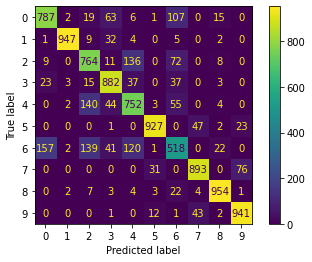

In [27]:
rf_acc = accuracy_score(y_test, rf_y_test_pred)
print(f"test accuracy: {rf_acc:.4f}")
rf_matrix = confusion_matrix(y_test, rf_y_test_pred)
print(rf_matrix)
print(rf_matrix.diagonal()/rf_matrix.sum(axis=1))

rf_dsp = ConfusionMatrixDisplay(rf_matrix, rf.classes_)
rf_dsp.plot()
plt.show()

## Adaboost

In [66]:
ab = AdaBoostClassifier(n_estimators=500, learning_rate=0.01)
ab.fit(X_train, y_train)
ab_y_test_pred = ab.predict(X_test)
ab_acc = accuracy_score(y_test, ab_y_test_pred)
print(f"test accuracy: {ab_acc:.4f}")

test accuracy: 0.5060


[[ 18   0   0 619   1   0 340   0  22   0]
 [  1   5   0 956   0   0  35   0   3   0]
 [  0   0   5  13  67   0 892   0  23   0]
 [  0   0   0 854   2   0 140   0   4   0]
 [  6   0   0  79 286   0 612   0  17   0]
 [  0   0   0   0   0 869   1   0 108  22]
 [ 16   0   1 204 112   0 633   0  34   0]
 [  0   0   0   0   0 952   0   0  34  14]
 [  0   0   0   6   3   4  91   0 896   0]
 [  0   0   0   0   0 370   0   0  16 614]]
[0.018 0.005 0.005 0.854 0.286 0.869 0.633 0.    0.896 0.614]


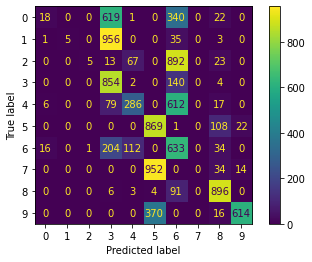

In [64]:
ab_matrix = confusion_matrix(y_test, ab_y_test_pred)
print(ab_matrix)
print(ab_matrix.diagonal()/ab_matrix.sum(axis=1))

ConfusionMatrixDisplay.from_predictions(y_test, ab_y_test_pred)

## Gradient Boost

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_y_test_pred = gb.predict(X_test)

In [49]:
gb_acc = accuracy_score(y_test, gb_y_test_pred)
print(f"test accuracy: {gb_acc:.4f}")
gb_matrix = confusion_matrix(y_test, gb_y_test_pred)
print(gb_matrix)
print(gb_matrix.diagonal()/gb_matrix.sum(axis=1))

ConfusionMatrixDisplay(gb_matrix)

NameError: name 'gb_y_test_pred' is not defined

## Logistic Regression

In [77]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
lr_y_test_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_y_test_pred)
print(f"test accuracy: {lr_acc:.4f}")

test accuracy: 0.7607


[[661  12  61  49  12   3 186   1  15   0]
 [  9 945   4  24   8   0   7   0   3   0]
 [ 22  18 621  19 151   2 155   0  12   0]
 [ 62  29  52 737  43   1  69   1   6   0]
 [  8   5 184  25 654   0 115   0   9   0]
 [  1   0   4   3   1 848  18  62  14  49]
 [154   7 144  46 126   1 494   0  28   0]
 [  0   0   0   1   0  39   5 905   1  49]
 [ 19   2  41  14  30  22  41   8 820   3]
 [  1   1   0   0   0  27   3  43   3 922]]
[0.661 0.945 0.621 0.737 0.654 0.848 0.494 0.905 0.82  0.922]


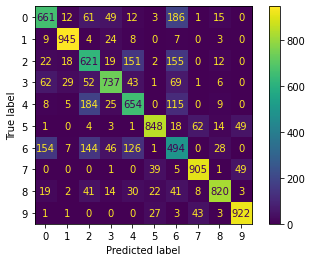

In [78]:
lr_matrix = confusion_matrix(y_test, lr_y_test_pred)
print(lr_matrix)
print(lr_matrix.diagonal()/lr_matrix.sum(axis=1))

ConfusionMatrixDisplay.from_predictions(y_test, lr_y_test_pred)

## KNN

In [82]:
knn_best = None
knn_best_pred = None
knn_best_acc = 0
knn_acc_lst = np.zeros(20)

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    knn_y_test_pred = knn.predict(X_test)
    knn_acc = accuracy_score(y_test, knn_y_test_pred)
    knn_acc_lst[i-1] = knn_acc
    if knn_acc > knn_best_acc:
        knn_best_acc = knn_acc
        knn_best = knn
        knn_best_pred = knn_y_test_pred
    print(f"{i}: {knn_acc:.4f}")
# ConfusionMatrixDisplay.from_predictions(y_test, knn_best_pred)

1: 0.7976
2: 0.7971
3: 0.8008
4: 0.8088
5: 0.8006
6: 0.8032
7: 0.7979
8: 0.7997
9: 0.7968
10: 0.7981
11: 0.7969
12: 0.7977
13: 0.7983
14: 0.7994
15: 0.7967
16: 0.7971
17: 0.7935
18: 0.7931
19: 0.7921
20: 0.7922


Text(0, 0.5, 'test error')

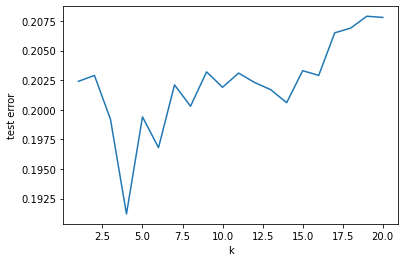

In [85]:
plt.plot(list(range(1,21)), 1-knn_acc_lst)
plt.xlabel("k")
plt.ylabel("test error")

## SVM with SGD

In [ ]:
# Train
lr = 0.5
n_epochs = 10
reg_const = 0.05

svm_fashion = SVM(n_class_fashion, lr, n_epochs, reg_const)
svm_fashion.train(X_train, y_train)

pred_svm = svm_fashion.predict(X_train)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train)))

In [ ]:
# Validate
pred_svm = svm_fashion.predict(X_val)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val)))

In [ ]:
# Test
pred_svm = svm_fashion.predict(X_test)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test)))

## Softmax Classifier (with SGD)

- lr, epoch, regularization constant

In [ ]:
# Train
lr = 0.5
n_epochs = 10
reg_const = 0.05

svm_fashion = SVM(n_class_fashion, lr, n_epochs, reg_const)
svm_fashion.train(X_train, y_train)

pred_svm = svm_fashion.predict(X_train)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train)))

In [ ]:
# Validate
pred_svm = svm_fashion.predict(X_val)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val)))

In [ ]:
# Test
pred_svm = svm_fashion.predict(X_test)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test)))

## Logistic Classifier

- threshold
- lr
- epochs

In [71]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

In [74]:
# Train
learning_rate = 0.1
n_epochs = 100
threshold = 0.5

lr = Logistic(learning_rate, n_epochs, threshold)
lr.train(X_train, y_train)

pred_lr = lr.predict(X_train)
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train)))

The training accuracy is given by: 8.580000


In [ ]:
# Validation
pred_lr = lr.predict(X_val_MR)
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_MR)))

In [76]:
# Test
pred_lr = lr.predict(X_test)
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test)))

The testing accuracy is given by: 9.270000


# ENSEMBLE

- KNN + RF + GB + LR
- Ramdom forest